# 9-1.PCA

In [2]:
import pandas as pd
from pandas import DataFrame
import numbers
import math
from openpyxl import load_workbook
import numpy as np

In [3]:
df=pd.read_csv("dongwan_BHS_outlier.csv", encoding='euc-kr')

In [4]:
from sklearn.preprocessing import MinMaxScaler
print(df.describe())

       Unnamed: 0       index           X           Y  busStop_distance  \
count  622.000000  622.000000  622.000000  622.000000        622.000000   
mean   310.500000  311.500000  127.124190   35.829978          0.167751   
std    179.700213  179.700213    0.030875    0.028820          0.107134   
min      0.000000    1.000000  127.002134   35.755008          0.004520   
25%    155.250000  156.250000  127.111918   35.806876          0.097312   
50%    310.500000  311.500000  127.127237   35.829819          0.144030   
75%    465.750000  466.750000  127.145670   35.851890          0.206900   
max    621.000000  622.000000  127.201837   35.898206          0.746780   

       hospital_distance  store_distance  
count         622.000000      622.000000  
mean            0.617095        0.985297  
std             0.630137        1.023632  
min             0.000000        0.005340  
25%             0.244740        0.393260  
50%             0.395350        0.663390  
75%             0.69405

In [5]:
df.drop(df.columns[0:9], axis=1, inplace=True)

In [6]:
df

,busStop_distance,hospital_distance,store_distance
0,0.06108,0.23747,0.53407
1,0.11142,0.39255,0.65370
2,0.12349,0.30154,0.33578
3,0.07438,0.31038,0.18369
4,0.19573,0.14143,0.24473
...,...,...,...
617,0.47055,0.66418,0.94672
618,0.21294,0.17293,0.51184
619,0.17097,0.40084,0.17488
620,0.11220,0.23573,0.49357


In [7]:
df_col=df.copy()

In [8]:
minmax=MinMaxScaler()
fitted=minmax.fit(df)
print(fitted.data_max_)

[0.74678 4.48638 7.14211]


In [9]:
df=pd.DataFrame(minmax.transform(df))
df.columns=df_col.columns
df
#df=pd.DataFrame(df, columns=data.columns, index=list(data.index.values))

,busStop_distance,hospital_distance,store_distance
0,0.076200,0.052931,0.074085
1,0.144020,0.087498,0.090848
2,0.160281,0.067212,0.046301
3,0.094118,0.069183,0.024990
4,0.257605,0.031524,0.033543
...,...,...,...
617,0.627853,0.148044,0.131906
618,0.280791,0.038546,0.070970
619,0.224248,0.089346,0.023756
620,0.145070,0.052543,0.068410


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

In [11]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,init ='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    

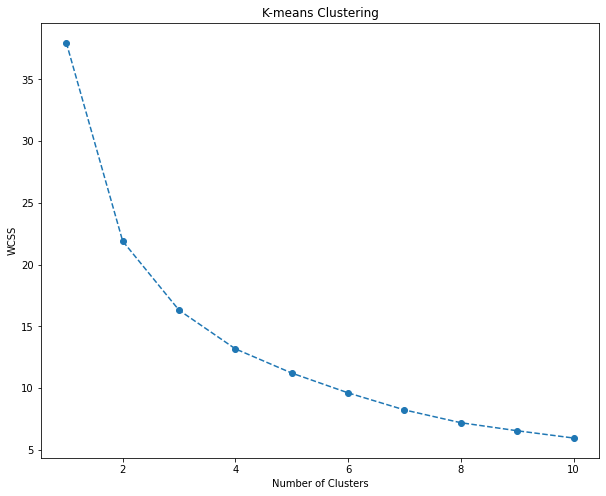

In [12]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering');

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
kmeans.fit(df)

y_predict=kmeans.fit_predict(df)
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 4 0 4 0 0 1 1 0 1 1 0 1 0 4 4 0 1 1 4 1 1 1 4 1 1 1
 1 4 4 1 1 1 1 1 1 4 3 2 2 2 3 1 1 1 2 3 1 2 1 1 3 1 1 1 1 1 1 1 1 4 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 4 1 1
 1 1 4 4 1 4 1 4 1 1 1 4 1 1 1 1 1 1 4 1 0 1 2 3 3 3 0 3 1 1 1 4 1 1 1 1 1
 0 0 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 0 1 1 1 1 1 1 4
 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 4 4 4 1 1 1 1 1 0 1 3 1 1 1 0 3 3
 0 2 0 3 4 3 0 4 4 4 1 1 4 1 4 1 1 1 4 1 4 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1
 1 4 1 4 1 4 1 4 4 4 1 1 1 4 4 1 1 4 4 4 1 1 1 1 1 4 0 1 1 0 4 1 0 1 1 1 1
 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 4 1 4 1
 4 1 1 4 1 1 1 0 1 4 1 1 4 1 4 1 1 1 1 4 4 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 4 4 1 4 4 1 1 1 1 4 1 1 1 4 4 4 4 1 1 4 1 1 0 1 0 0 0 0 0
 3 1 1 3 1 1 1 1 3 1 1 1 1 3 1 2 3 1 1 1 1 3 3 0 1 1 1 4 0 1 4 1 1 1 4 1 1
 1 3 3 1 0 1 2 2 2 1 4 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 4 1 4 4 1 4 1 1 

In [14]:
y_predict=pd.DataFrame(y_predict)
y_predict.columns=['cluster_grade']
y_predict

,cluster_grade
0,1
1,1
2,1
3,1
4,1
...,...
617,4
618,1
619,1
620,1


In [15]:
raw=pd.read_csv("dongwan_BHS_outlier.csv", encoding='euc-kr')

In [16]:
cluster_test=pd.concat([raw, y_predict], axis=1, join='inner')

cluster_test

,Unnamed: 0,index,city,borough,name,address,X,Y,dong,busStop_distance,hospital_distance,store_distance,cluster_grade
0,0,1,전라북도,전주시 완산구,다가제일경로당,전라북도 전주시 완산구 전주천동로 200-50(다가동2가),127.140363,35.814468,중앙동,0.06108,0.23747,0.53407,1
1,1,2,전라북도,전주시 완산구,태평 2경로당,전라북도 전주시 완산구 물레방아1길 43-68(태평동),127.136285,35.822145,중앙동,0.11142,0.39255,0.65370,1
2,2,3,전라북도,전주시 완산구,태평 1경로당,전라북도 전주시 완산구 공북로67-5(태평동),127.138975,35.826229,중앙동,0.12349,0.30154,0.33578,1
3,3,4,전라북도,전주시 완산구,연수정경로당,전라북도 전주시 완산구 전라감영5길 19-11(중앙동3가),127.145157,35.817350,중앙동,0.07438,0.31038,0.18369,1
4,4,5,전라북도,전주시 완산구,일심자모경로당,전라북도 전주시 완산구 전주객사2길 46-8(고사동),127.140980,35.818853,중앙동,0.19573,0.14143,0.24473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,617,618,전라북도,전주시 덕진구,동산경로당,전라북도 전주시 덕진구 호성동산길 57,127.153592,35.869172,호성동,0.47055,0.66418,0.94672,4
618,618,619,전라북도,전주시 덕진구,만수(진흥2차)경로당,전라북도 전주시 덕진구 호성로 136,127.146591,35.864256,호성동,0.21294,0.17293,0.51184,1
619,619,620,전라북도,전주시 덕진구,진흥더블파크1단지경로당,전라북도 전주시 덕진구 호성로 132,127.149085,35.861975,호성동,0.17097,0.40084,0.17488,1
620,620,621,전라북도,전주시 덕진구,신동아2차아파트경로당,전라북도 전주시 덕진구 호성1길 30,127.153277,35.857128,호성동,0.11220,0.23573,0.49357,1


In [17]:
cluster_test['cluster_grade'].value_counts()

1    398
4    101
0     67
3     38
2     18
Name: cluster_grade, dtype: int64

In [18]:
cluster_test.to_csv("cluster_test_5.csv", encoding='euc-kr')

In [19]:
# pca test

In [20]:
df

,busStop_distance,hospital_distance,store_distance
0,0.076200,0.052931,0.074085
1,0.144020,0.087498,0.090848
2,0.160281,0.067212,0.046301
3,0.094118,0.069183,0.024990
4,0.257605,0.031524,0.033543
...,...,...,...
617,0.627853,0.148044,0.131906
618,0.280791,0.038546,0.070970
619,0.224248,0.089346,0.023756
620,0.145070,0.052543,0.068410


In [21]:
pca_test=pd.concat([df,y_predict],axis=1, join='inner')

In [22]:
pca_test

,busStop_distance,hospital_distance,store_distance,cluster_grade
0,0.076200,0.052931,0.074085,1
1,0.144020,0.087498,0.090848,1
2,0.160281,0.067212,0.046301,1
3,0.094118,0.069183,0.024990,1
4,0.257605,0.031524,0.033543,1
...,...,...,...,...
617,0.627853,0.148044,0.131906,4
618,0.280791,0.038546,0.070970,1
619,0.224248,0.089346,0.023756,1
620,0.145070,0.052543,0.068410,1


In [23]:
pca_test['cluster_grade'].value_counts()

1    398
4    101
0     67
3     38
2     18
Name: cluster_grade, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)
x = pca_test.drop(['cluster_grade'], axis=1).values
y=pca_test['cluster_grade'].values

In [26]:
x = StandardScaler().fit_transform(x)

features = ['busStop_distance', 'hospital_distance', 'store_distance']
pd.DataFrame(x, columns=features).head()

,busStop_distance,hospital_distance,store_distance
0,-0.996478,-0.602933,-0.441165
1,-0.526222,-0.356630,-0.324202
2,-0.413468,-0.501175,-0.635033
3,-0.872235,-0.487135,-0.783731
4,0.261369,-0.755467,-0.724052


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

principalDf.head()

,principal component1,principal component2
0,-1.002514,-0.735144
1,-0.616562,-0.359226
2,-0.889579,-0.150397
3,-1.116572,-0.554208
4,-0.920759,0.560114


In [29]:
pca = PCA(n_components=3)

printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3'])

pca.explained_variance_ratio_

array([0.58594839, 0.30913282, 0.1049188 ])

# cluster 시각화

### 2차원 PCA

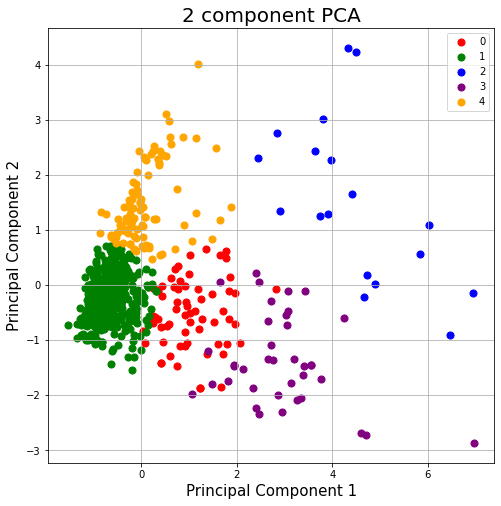

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = pca_test['cluster_grade'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
               , principalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 3차원 PCA

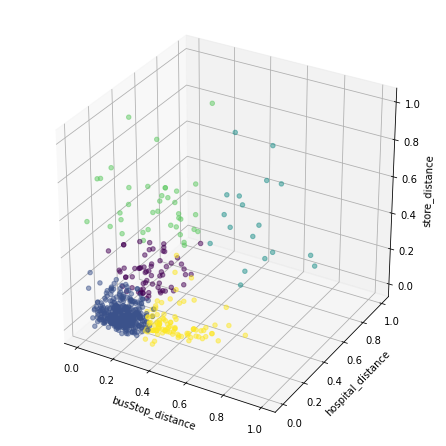

In [42]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(pca_test['busStop_distance'], pca_test['hospital_distance'], pca_test['store_distance'], c=pca_test['cluster_grade'], alpha=0.5)
ax.set_xlabel('busStop_distance')
ax.set_ylabel('hospital_distance')
ax.set_zlabel('store_distance')

yy=pca_test.loc[:, ['cluster_grade']].values


labels=[]
y_list=yy.tolist()
for label in y_list:
    if label[0] not in labels:
        labels.append(label[0])
        
ax.grid()

plt.show()